# Below Zero - Ice Cream Store  ( Task B )
Below Zero has asked for some analysis on the current trends in ice cream sales in the five neighbouring regions. As a result, you were able to source weekly sales data for 45 stores over 3 years (2010 –2012).

### Ice Cream Trends
In this second part of Task 2, you should write a Python script that reads and analyses the ice cream data file (Weekly_Sales.csv) and merge it with the store details file (StoreDetails.csv) and region file (Region.csv) to produce at least FOUR useful graphs that give insight into the ice cream sales trends.
For example, here are some suggestions:
    •show the change in ice cream sales over the period 2010 to2012
    •Compare the trends of all stores in a given year.
    •Compare sales against the different store details (i.e. temperature and unemployment) to see what the relationship between them is (data from StoreDetails.csv).
    •Compare sales in the five different regions (using the data from the Region.csv to group the stores).

Notes:
1.You must at least have 1 graph analysing temperature or unemployment and 1 graph comparing the sales across the different regions.
2.You must use the Pandas library to store and manipulate the data.
3.Use markup and headings to break your Jupyter notebook into sections and give commentary about what you doing, and discussion of your results. 

### Importing necessary Libraries And Data Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
region=pd.read_csv('Region.csv')

In [4]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
Store     45 non-null int64
Region    45 non-null object
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
region.head()

,Store,Region
0,1,A
1,2,A
2,3,A
3,4,A
4,5,A


In [6]:
StoreDetails=pd.read_csv('StoreDetails.csv')

In [7]:
StoreDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 4 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Unemployment    7605 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 256.0+ KB


In [8]:
StoreDetails.head()

,Store,Date,Temperature,Unemployment
0,1,5/02/2010,42.31,8.106
1,1,12/02/2010,38.51,8.106
2,1,19/02/2010,39.93,8.106
3,1,26/02/2010,46.63,8.106
4,1,5/03/2010,46.50,8.106


In [9]:
WeeklySales=pd.read_csv('Weekly-Sales.csv')

In [10]:
WeeklySales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 150.9+ KB


In [11]:
WeeklySales.head()

,Store,Date,Weekly_Sales
0,1,5/02/2010,24924.50
1,1,12/02/2010,46039.49
2,1,19/02/2010,41595.55
3,1,26/02/2010,19403.54
4,1,5/03/2010,21827.90


### Merging three data files

In [13]:
store_data=pd.merge(StoreDetails,WeeklySales,on=['Store','Date'])

In [14]:
store_data.head()

,Store,Date,Temperature,Unemployment,Weekly_Sales
0,1,5/02/2010,42.31,8.106,24924.50
1,1,12/02/2010,38.51,8.106,46039.49
2,1,19/02/2010,39.93,8.106,41595.55
3,1,26/02/2010,46.63,8.106,19403.54
4,1,5/03/2010,46.50,8.106,21827.90


In [15]:
store_data=pd.merge(store_data,region,on=['Store'])

In [16]:
store_data.head()

,Store,Date,Temperature,Unemployment,Weekly_Sales,Region
0,1,5/02/2010,42.31,8.106,24924.50,A
1,1,12/02/2010,38.51,8.106,46039.49,A
2,1,19/02/2010,39.93,8.106,41595.55,A
3,1,26/02/2010,46.63,8.106,19403.54,A
4,1,5/03/2010,46.50,8.106,21827.90,A


### Stores in each Region

In [168]:
region.groupby(['Region'])['Store'].count()

Region
A    9
B    9
C    9
D    9
E    9
Name: Store, dtype: int64

### Total sales of each store from 2010 - 2012

In [19]:
store_data.groupby(['Store'])['Weekly_Sales'].sum()

Store
1     3219405.18
2     4401251.25
3     1047992.81
4     5288131.43
5     1397761.09
6     3413060.19
7     1364620.58
8     2114945.31
9     1694057.83
10    5709294.87
11    2697110.41
12    2478202.53
13    6723925.13
14    4377485.02
15    1979941.94
16    1623404.55
17    3260630.11
18    3144334.94
19    3075076.17
20    5798002.67
21    2137857.04
22    3073537.77
23    4745663.86
24    2696840.34
25    2880863.34
26    2774595.10
27    4352630.60
28    2885804.92
29    2217172.04
30    1399737.86
31    2482001.30
32    3267927.45
33     340209.38
34    2852502.95
35    2442818.65
36     320209.52
37    1576465.73
38     990066.01
39    3135278.03
40    2687624.77
41    3318352.17
42    1483646.22
43    1079522.59
44    1151148.90
45    2537665.99
Name: Weekly_Sales, dtype: float64

In [20]:
store_profit=store_data.groupby(['Store'])['Weekly_Sales'].sum()

In [204]:
store_profit.head()

Store
1    3219405.18
2    4401251.25
3    1047992.81
4    5288131.43
5    1397761.09
Name: Weekly_Sales, dtype: float64

### Bar-Plot showing Profit of each Store

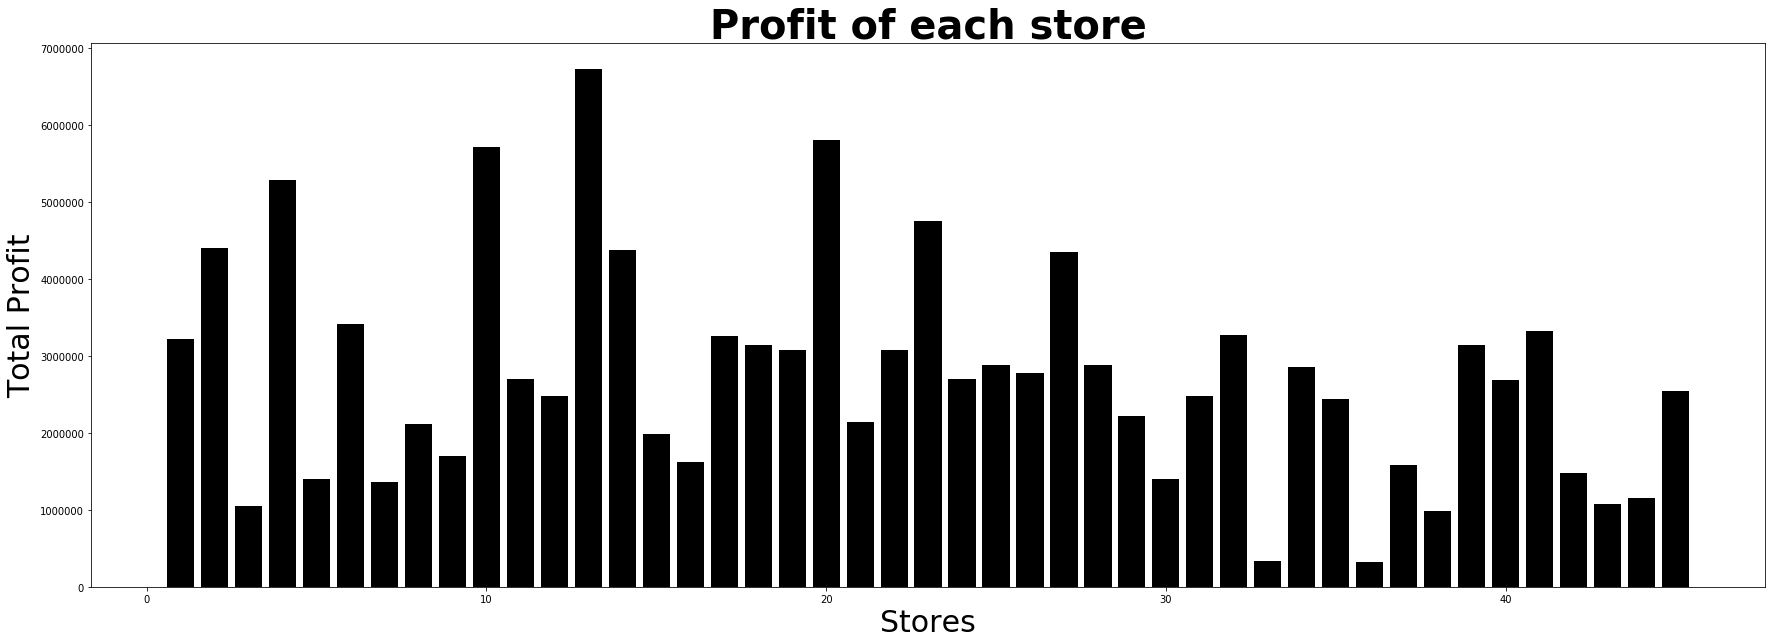

In [98]:
d=[x for x in range(46)if x>0]
plt.subplots(figsize=(30,10))
plt.bar(d,store_profit,color ='k')

plt.xlabel('Stores',fontsize='30')
plt.ylabel('Total Profit',fontsize='30')

plt.title('Profit of each store',fontweight='bold',fontsize='40')
plt.show()
plt.show()

In [25]:
print("Mean profit of Stores : "+str(store_profit.mean()))

Mean profit of Stores : 2747528.367555556


### Total sales in each Region from 2010 - 2012

In [101]:
region_profit=store_data.groupby(['Region'])['Weekly_Sales'].sum()

In [102]:
region_profit.head()

Region
A    23941225.67
B    31994329.50
C    31535066.89
D    18208384.07
E    17959770.41
Name: Weekly_Sales, dtype: float64

### Bar-Plot showing Profit in each Region

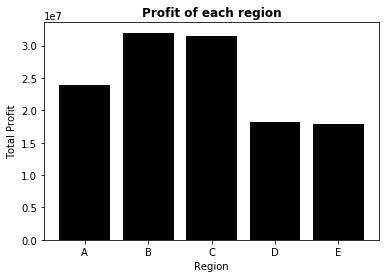

In [100]:
d=['A','B','C','D','E']
#plt.subplots(figsize=(50,20))
plt.bar(d,region_profit,color ='k')

plt.xlabel('Region')
plt.ylabel('Total Profit')

plt.title('Profit of each region',fontweight='bold')
plt.show()
plt.show()

### Top 10 stores with maximum profit

In [26]:
store_profit.sort_values(ascending=False).head(10)

Store
13    6723925.13
20    5798002.67
10    5709294.87
4     5288131.43
23    4745663.86
2     4401251.25
14    4377485.02
27    4352630.60
6     3413060.19
41    3318352.17
Name: Weekly_Sales, dtype: float64

### Sales of stores in each year

In [153]:
df_1=store_data[store_data['Date'].str.contains("/2010")]

In [206]:
df_1.groupby(['Region'])['Weekly_Sales'].sum()

Region
A     8202911.50
B    11138795.06
C    11255439.84
D     6274930.62
E     5971457.36
Name: Weekly_Sales, dtype: float64

In [207]:
df_1.head()

,Store,Date,Temperature,Unemployment,Weekly_Sales,Region,total_profit
0,1,5/02/2010,42.31,8.106,24924.50,A,3219405.18
1,1,12/02/2010,38.51,8.106,46039.49,A,3219405.18
2,1,19/02/2010,39.93,8.106,41595.55,A,3219405.18
3,1,26/02/2010,46.63,8.106,19403.54,A,3219405.18
4,1,5/03/2010,46.50,8.106,21827.90,A,3219405.18


In [142]:
df_2=store_data[store_data['Date'].str.contains("/2011")]

In [143]:
df_2.groupby(['Region'])['Weekly_Sales'].sum()

Region
A     8705549.43
B    11885412.92
C    11512218.97
D     6671399.21
E     6574733.87
Name: Weekly_Sales, dtype: float64

In [107]:
df_3=store_data[store_data['Date'].str.contains("/2012")]

In [138]:
df_3.groupby(['Region'])['Weekly_Sales'].sum()

Region
A    7032764.74
B    8970121.52
C    8767408.08
D    5262054.24
E    5413579.18
Name: Weekly_Sales, dtype: float64

### Bar-Plot of profit of stores in each region per year

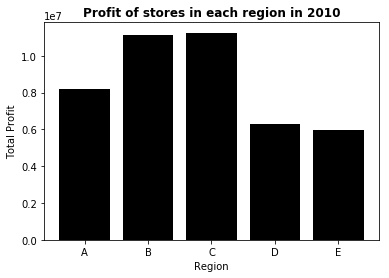

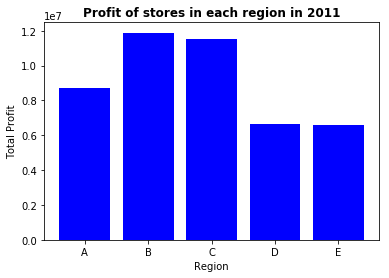

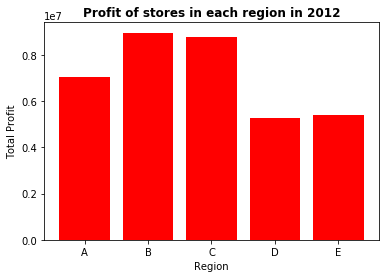

In [208]:
d=['A','B','C','D','E']

region_profit2010=df_1.groupby(['Region'])['Weekly_Sales'].sum()
plt.bar(d,region_profit2010,color ='k')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Profit of stores in each region in 2010',fontweight='bold')
plt.show()

region_profit2011=df_2.groupby(['Region'])['Weekly_Sales'].sum()
plt.bar(d,region_profit2011,color ='b')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Profit of stores in each region in 2011',fontweight='bold')
plt.show()

region_profit2012=df_3.groupby(['Region'])['Weekly_Sales'].sum()
plt.bar(d,region_profit2012,color ='r')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Profit of stores in each region in 2012',fontweight='bold')
plt.show()



### Bar-Plot of profit of each store per year

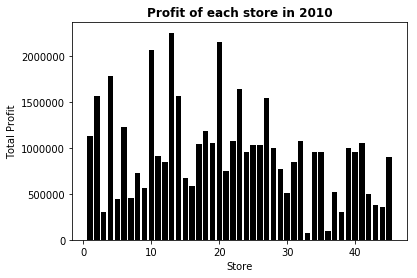

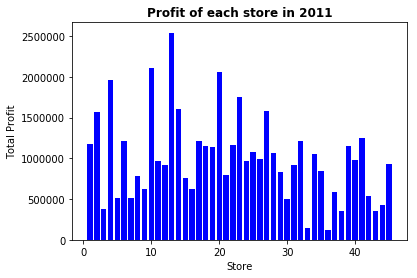

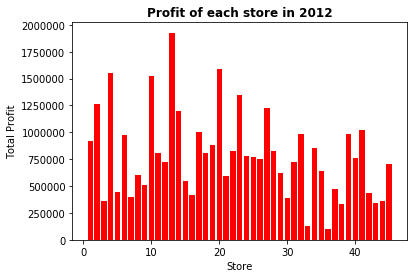

In [210]:
d=[x for x in range(46)if x>0]

region_profit2010=df_1.groupby(['Store'])['Weekly_Sales'].sum()
plt.bar(d,region_profit2010,color ='k')
plt.xlabel('Store')
plt.ylabel('Total Profit')
plt.title('Profit of each store in 2010',fontweight='bold')
plt.show()

region_profit2011=df_2.groupby(['Store'])['Weekly_Sales'].sum()
plt.bar(d,region_profit2011,color ='b')
plt.xlabel('Store')
plt.ylabel('Total Profit')
plt.title('Profit of each store in 2011',fontweight='bold')
plt.show()

region_profit2012=df_3.groupby(['Store'])['Weekly_Sales'].sum()
plt.bar(d,region_profit2012,color ='r')
plt.xlabel('Store')
plt.ylabel('Total Profit')
plt.title('Profit of each store in 2012',fontweight='bold')
plt.show()

In [140]:
df_1.groupby(['Store'])['Weekly_Sales'].sum().head()

Store
1    1171550.80
2    1566742.87
3     377637.94
4    1954980.78
5     511021.50
Name: Weekly_Sales, dtype: float64

In [146]:
df_2.groupby(['Store'])['Weekly_Sales'].sum().head()

Store
1    1171550.80
2    1566742.87
3     377637.94
4    1954980.78
5     511021.50
Name: Weekly_Sales, dtype: float64

In [147]:
df_3.groupby(['Store'])['Weekly_Sales'].sum().head()

Store
1     921505.65
2    1262610.20
3     365161.01
4    1553193.42
5     443915.75
Name: Weekly_Sales, dtype: float64

### Top 10 performing stores each year

In [158]:
df_1.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

Store
13    2257010.66
20    2155536.75
10    2073394.31
4     1779957.23
23    1648923.44
2     1571898.18
14    1565400.69
27    1544366.01
6     1227756.19
18    1182928.09
Name: Weekly_Sales, dtype: float64

In [159]:
df_2.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

Store
13    2540585.58
10    2108481.44
20    2056700.30
4     1954980.78
23    1750173.16
14    1610669.10
27    1583136.21
2     1566742.87
41    1244173.41
6     1215094.97
Name: Weekly_Sales, dtype: float64

In [160]:
df_3.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

Store
13    1926328.89
20    1585765.62
4     1553193.42
10    1527419.12
23    1346567.26
2     1262610.20
27    1225128.38
14    1201415.23
41    1020020.00
17    1007126.78
Name: Weekly_Sales, dtype: float64

## Temperature

### Mean Temperature of each Region

In [198]:
store_data.groupby(['Region'])['Temperature'].mean()

Region
A    64.370031
B    58.121694
C    54.159340
D    64.366472
E    62.301375
Name: Temperature, dtype: float64

### Bar-Plot of Temperature of each Region

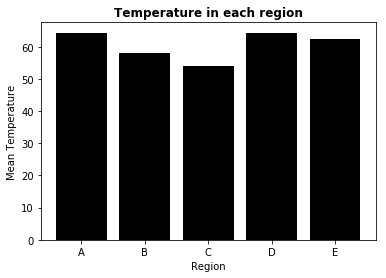

In [200]:
d=['A','B','C','D','E']

plt.bar(d,store_data.groupby(['Region'])['Temperature'].mean(),color ='k')
plt.xlabel('Region')
plt.ylabel('Mean Temperature')
plt.title('Temperature in each region',fontweight='bold')
plt.show()

## Unemployment

### Umployment in each Region

In [175]:
store_data.groupby(['Region'])['Unemployment'].mean()

Region
A    6.895079
B    8.240995
C    7.505460
D    9.097986
E    8.256235
Name: Unemployment, dtype: float64

### Bar-Plot of Umployment in each Region

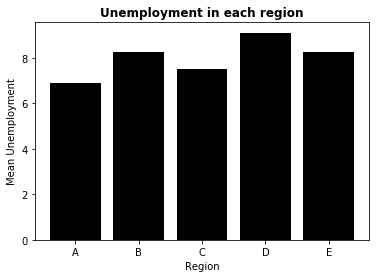

In [180]:
d=['A','B','C','D','E']

plt.bar(d,store_data.groupby(['Region'])['Unemployment'].mean(),color ='k')
plt.xlabel('Region')
plt.ylabel('Mean Unemployment')
plt.title('Unemployment in each region',fontweight='bold')
plt.show()

### Umployment in each store

In [186]:
unemp_store=store_data.groupby(['Store'])['Unemployment'].mean().head(10)

In [211]:
unemp_store.head()

Store
1    7.610420
2    7.623846
3    7.176986
4    5.964692
5    6.295406
Name: Unemployment, dtype: float64

### Bar-Plot of Umployment of each Store

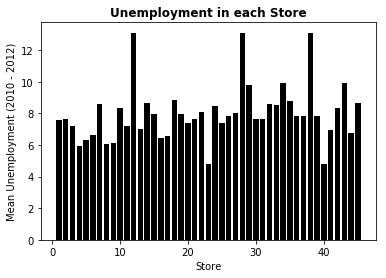

In [187]:
d=[x for x in range(46)if x>0]

plt.bar(d,store_data.groupby(['Store'])['Unemployment'].mean(),color ='k')
plt.xlabel('Store')
plt.ylabel('Mean Unemployment (2010 - 2012)')
plt.title('Unemployment in each Store',fontweight='bold')
plt.show()

### Joint-Plot showing relation between Unemployment and Weekly Sales of a store.

C:\Users\Aman\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Aman\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


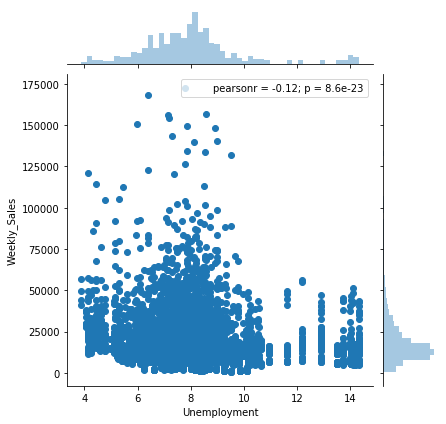

In [203]:
sns.jointplot(x='Unemployment',y='Weekly_Sales',data=store_data,kind="scatter")